<a href="https://colab.research.google.com/github/RaghavMaskara21/abc/blob/main/Experiment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Frequency domain analysis (part-A).

Consider an image and perform the following operations:
1. Discrete Fourier Transform (DFT) using Equation
2. Verify the implemented function of DFT with inbuilt function
(Hint: np.fft.fft2, np.fft.fftshift or cv2.dft(), cv2.idft())
3. Plot magnitude and Phase spectrum (Hint: magnitude : 20*np.log(np.abs()),
Phase: np.angle())
4. Apply shifting operation and observe the magnitude and phase spectrum
5. Apply rotation and observe the magnitude and phase spectrum
 (Hint: np.rot90())

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

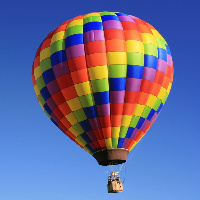

In [2]:
img = cv2.imread('pic1.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, [200,200])
cv2_imshow(img)

In [3]:
import cmath
def DFT2D(image): 
  data = np.asarray(image) 
  M, N = image.shape[:2] 
  dft2d = np.zeros((M,N),dtype=complex) 
  for k in range(M): 
    for l in range(N): 
      sum_matrix = 0.0 
      for m in range(M): 
        for n in range(N): 
          e = cmath.exp(- 2j * np.pi * ((k * m) / M + (l * n) / N)) 
          sum_matrix += data[m,n] * e 
        dft2d[k,l] = sum_matrix 
  return dft2d

In [4]:
x = np.arange(-25, 26, 1) 
X, Y = np.meshgrid(x, x) 
wavelength = 10 
grating = np.sin(2 * np.pi * X / wavelength)

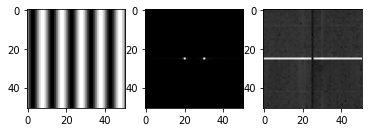

In [5]:
plt.set_cmap("gray") 
plt.subplot(131) 
plt.imshow(grating) 
img=DFT2D(grating) 
ft = np.fft.fftshift(img) 
plt.subplot(132) 
plt.imshow(abs(ft)) 
plt.subplot(133) 
plt.imshow(np.log(abs(ft))) 
plt.show()

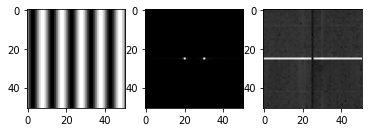

In [6]:
x = np.arange(-25, 26, 1) 
X, Y = np.meshgrid(x, x)
wavelength = 10 
grating = np.sin(2 * np.pi * X / wavelength) 
plt.set_cmap("gray") 
plt.subplot(131) 
plt.imshow(grating) 
ft = np.fft.ifftshift(grating) 
ft = np.fft.fftshift(img) 
plt.subplot(132)
plt.imshow(abs(ft)) 
plt.subplot(133) 
plt.imshow(np.log(abs(ft))) 
plt.show()

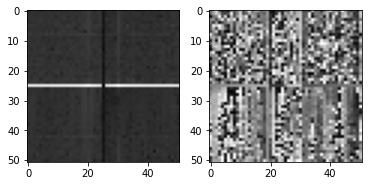

In [7]:
ft = np.fft.ifftshift(grating) 
ft = np.fft.fftshift(img) 
plt.subplot(121) 
plt.imshow(20*np.log(abs(ft))) 
plt.subplot(122) 
plt.imshow(np.angle(ft)) 
plt.show()

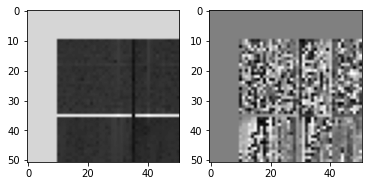

In [8]:
import scipy
import scipy.ndimage
ft = np.fft.ifftshift(grating) 
ft = np.fft.fftshift(img) 
plt.subplot(121) 
plt.imshow(scipy.ndimage.shift(20*np.log(abs(ft)), 10)) 
plt.subplot(122) 
plt.imshow(scipy.ndimage.shift(np.angle(ft), 10)) 
plt.show()

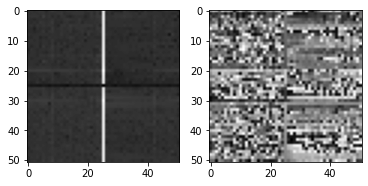

In [9]:
ft = np.fft.ifftshift(grating) 
ft = np.fft.fftshift(img) 
plt.subplot(121) 
plt.imshow(np.rot90(20*np.log(abs(ft)))) 
plt.subplot(122) 
plt.imshow(np.rot90(np.angle(ft))) 
plt.show()